# Table of Contents

1. [Problem Statement](#pstatement)
2. [Data Loading and Spliting](#dload)
3. [Data Augmentation](#daugment)
4. [Model Building](#mbuild)
5. [Model Training](#mtrain)
6. [Performance Visualization](#pvis)
7. [Model Testing](#mtest)
8. [Performance Measures](#pmeasures)
9. [Qualitative Results](#quality)

# Problem Statement<a id='pstatement'><\a>
To implement an image degmentation pipeline using CNNs to get sementic understanding of the images.


**Monuseg dataset** (available [here](https://monuseg.grand-challenge.org/Data/)) is downloaded and the ground truth segmentation masks are created. The dataset can be either obtained from the instructor or can be downloaded from [this](https://drive.google.com/drive/folders/1hnHjxFb52BdhxkcV_N7MdWLdagzXHzmq?usp=sharing) Google Drive link.

In [0]:
#Imports the print function from newer versions of python
from __future__ import print_function

%tensorflow_version 1.x
%matplotlib inline

TensorFlow 1.x selected.


In [0]:
!git clone https://github.com/zeeshanalipnhwr/Semantic-Segmentation-Keras
!mv Semantic-Segmentation-Keras Semantic_Segmentation_Keras

Cloning into 'Semantic-Segmentation-Keras'...
remote: Enumerating objects: 212, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (200/200), done.
remote: Total 404 (delta 104), reused 0 (delta 0), pack-reused 192
Receiving objects: 100% (404/404), 21.74 MiB | 4.57 MiB/s, done.
Resolving deltas: 100% (190/190), done.


# Data Loading and Spliting<a id='dload'><\a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip "/content/drive/My Drive/MonuSeg-dataset"

Archive:  /content/drive/My Drive/MonuSeg-dataset.zip
  inflating: MonuSeg/Test/GroundTruth/TCGA-AC-A2FO-01A-01-TS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-IZ-8196-01A-01-BS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-ZF-A9R5-01A-01-TS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-A6-6782-01A-01-BS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-2Z-A9J9-01A-01-TS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-HT-8564-01Z-00-DX1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-44-2665-01B-06-BS6_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-EJ-A46H-01A-03-TSC_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-69-7764-01A-01-TS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-GL-6846-01A-01-BS1_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-CU-A0YN-01A-02-BSB_bin_mask.png  
  inflating: MonuSeg/Test/GroundTruth/TCGA-FG-A4MU-01B-01-TS1_bin_mask.png  
  inflating: MonuSeg/T

In [0]:
files_path = "./MonuSeg"

X_train:  (24, 1024, 1024, 3) 
Y_train:  (24, 1024, 1024, 1)
X_valid:  (6, 1024, 1024, 3) 
Y_valid:  (6, 1024, 1024, 1)
X_test:  (14, 1024, 1024, 3) 
Y_test:  (14, 1024, 1024, 1)


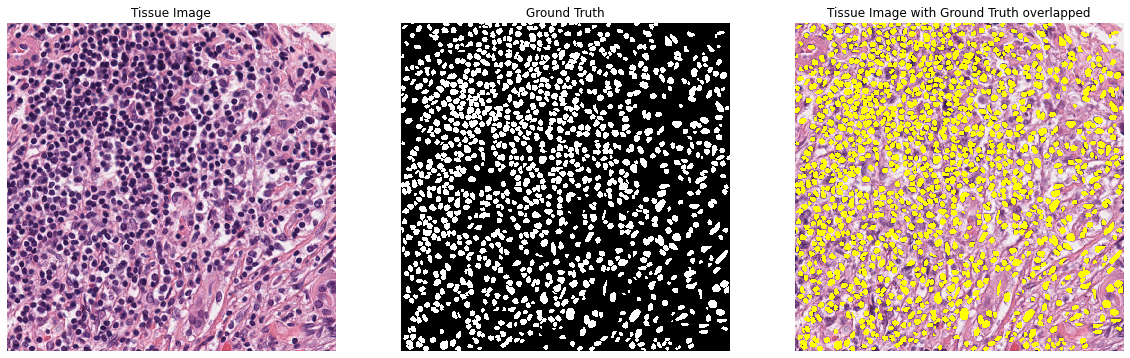

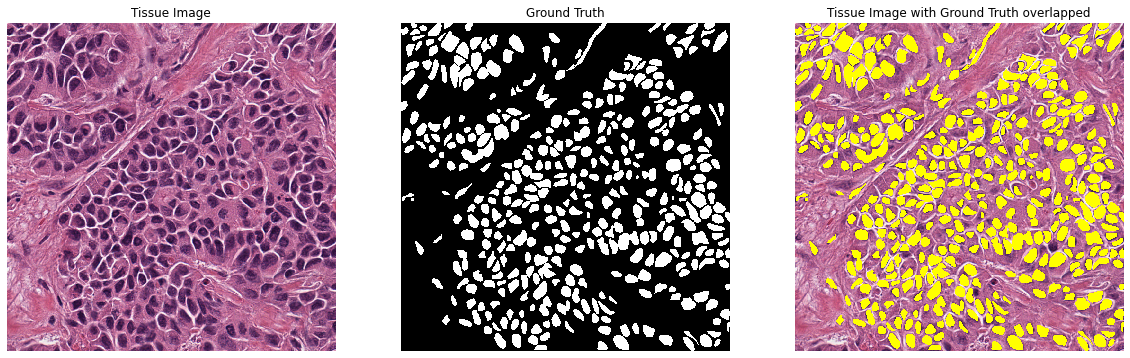

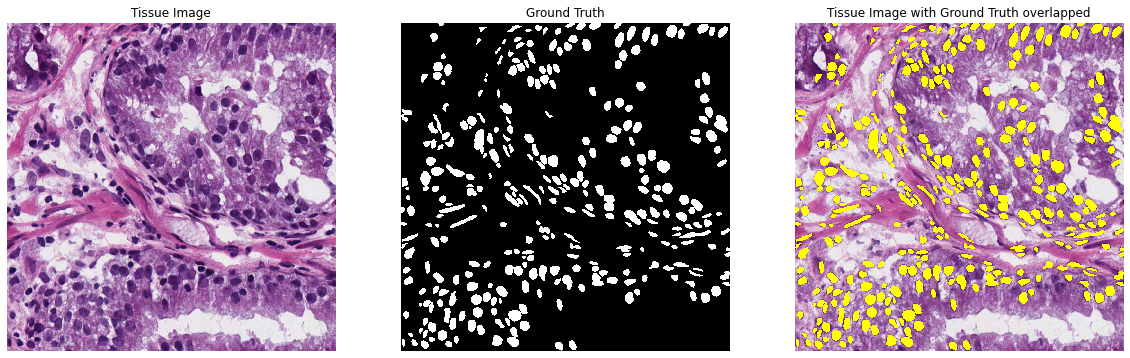

In [0]:
from Semantic_Segmentation_Keras.Utils import display, load_data

(X_train, X_valid, X_test,
 Y_train, Y_valid, Y_test) = load_data.load_data(files_path, load_as="rgb",
                                       resize_as=(1024, 1024), validation_size=0.2)

print ("X_train: ", X_train.shape, "\nY_train: ", Y_train.shape)
print ("X_valid: ", X_valid.shape, "\nY_valid: ", Y_valid.shape)
print ("X_test: ", X_test.shape, "\nY_test: ", Y_test.shape)

display.display_masked(image=X_train[0], mask=Y_train[0].round(0),
               image_name="Tissue Image", mask_name="Ground Truth")
display.display_masked(image=X_valid[0], mask=Y_valid[0].round(0),
               image_name="Tissue Image", mask_name="Ground Truth")
display.display_masked(image=X_test[0], mask=Y_test[0].round(0),
               image_name="Tissue Image", mask_name="Ground Truth")

# Data Augmentation

In [0]:
pass

# Model Building<a id='mbuild'><\a>

![SegNet Architecture](https://www.researchgate.net/profile/Vijay_Badrinarayanan/publication/283471087/figure/fig1/AS:391733042008065@1470407843299/An-illustration-of-the-SegNet-architecture-There-are-no-fully-connected-layers-and-hence.png)

In [0]:
from Semantic_Segmentation_Keras.Models import SegNet
from Semantic_Segmentation_Keras.Configs import SegNet_Configs

model = SegNet.SegNet(depth=SegNet_Configs.DEPTH).SegNet(input_shape=(X_train[0].shape))

In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1024, 1024, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 1024, 1024, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 1024, 1024, 6 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 1024, 1024, 6 36928       batch_normalization_1[0][0]      
____________________________________________________________________________________________

# Model Training<a id='mtrain'><\a>

In [0]:
from Semantic_Segmentation_Keras import train
H = train.train_model(model, X_train, Y_train, validation_data=(X_valid, Y_valid),
                save=True, save_to="drive/My Drive/", save_as="segnet_basic")



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 24 samples, validate on 6 samples
Epoch 1/100
24/24 [==============================] - 45s 2s/step - loss: 0.5993 - acc: 0.6948 - f1_score: 0.5557 - val_loss: 3.1133 - val_acc: 0.5997 - val_f1_score: 0.5349
Epoch 2/100
24/24 [==============================] - 32s 1s/step - loss: 0.3973 - acc: 0.8589 - f1_score: 0.7364 - val_loss: 3.4937 - val_acc: 0.5362 - val_f1_score: 0.5051
Epoch 3/100
24/24 [==============================] - 32s 1s/step - loss: 0.3537 - acc: 0.8679 - f1_score: 0.7430 - val_loss: 5.6878 - val_acc: 0.4593 - val_f1_score: 0.4827
Epoch 4/100
24/24 [==============================] - 32s 1s/step - loss: 0.3231 - acc: 0.8697 - f1_score: 0.7485 - val_loss: 2.5787 - val_acc: 0.6117 - val_f1_score: 0.4478
Epoch 5/100
24/24 [==============================] - 32s 1s/step - loss: 0.3091 - acc: 0.8716 - f1_score: 0.7412 - val_loss: 2.3461 - val_acc: 0.5542 - val_f1_score: 0

# Performance Visualization<a id='pvis'><\a>

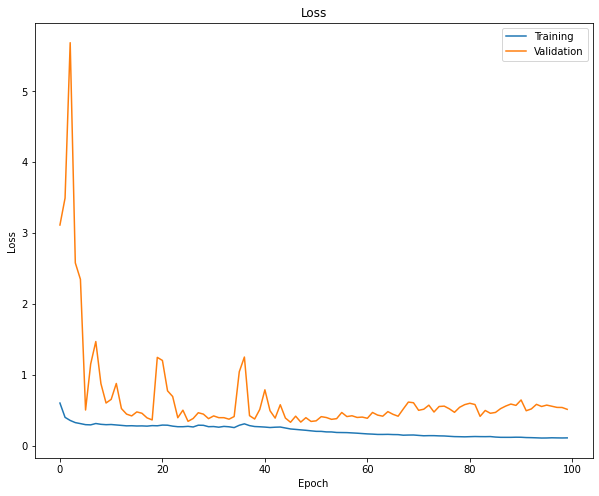

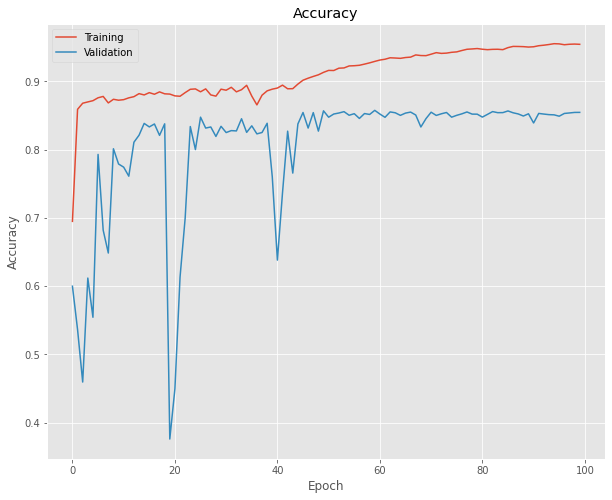

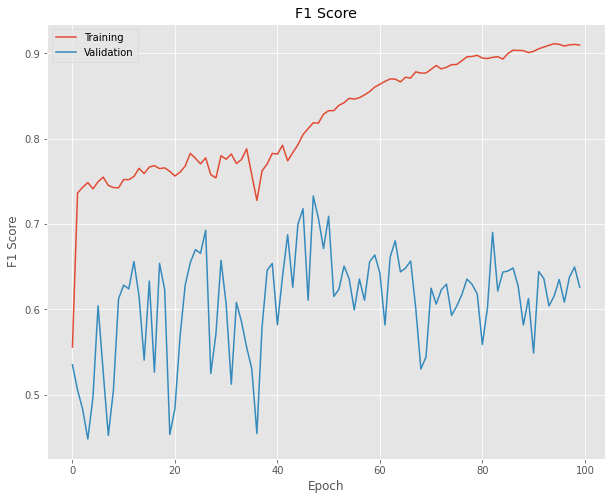

In [0]:
from Semantic_Segmentation_Keras.Utils import display

display.plot_train_valid_performance(H, SegNet_Configs.EPOCHS, save_figures=True,
                                     save_to="drive/My Drive/", model_name="segnet_basic")

# Model Testing<a id='mtest'><\a>

In [0]:
test_loss, test_acc, test_f1_score = model.evaluate(X_test, Y_test, batch_size=SegNet_Configs.BATCHSIZE)
test_loss, test_acc, test_f1_score

14/14 [==============================] - 11s 753ms/step


(0.2753460609487125, 0.8856772014072963, 0.7285645646708352)

In [0]:
# make predictions on the network
predictions = model.predict(X_test, batch_size=SegNet_Configs.BATCHSIZE)

# Performance Measures<a id='pmeasures'><\a>

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
TN, FP, FN, TP = confusion_matrix(Y_test.flatten().astype(int),
                             predictions.round(0).flatten().astype(int)).ravel()

In [0]:
TN, FP, FN, TP

(10768793, 1013126, 665140, 2233005)

## Accuracy
It is defined as $accuracy = \frac{TP+TN}{TP+FP+TN+FN}$.

In [0]:
print ("Accuracy:", round((TP+TN)/(TP+FP+TN+FN)*100, 2))

Accuracy: 88.57


In [0]:
print ("Accuracy:", round(test_acc*100, 2))

Accuracy: 88.57


## F1 Score (Dice Score)

It is defined as the harmonic mean of precision and recall as $F_1=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}$ where $precision=\frac{TP}{TP+FP}$ and $recall=\frac{TP}{TP+FN}$. This simplifies to and hence is equal to the dice score coefficient which is defined as $DSC = \frac{2\times{TP}}{2\times{TP}+FP+FN}$.

In [0]:
precision, recall = TP/(TP+FP), TP/(TP+FN)
print ("F1 Score:", round(2.0/(1.0/precision+1.0/recall), 4))

F1 Score: 0.7269


In [0]:
print ("F1 Score:", round(test_f1_score, 4))

F1 Score: 0.7286


## Classification Report

In [0]:
print (classification_report(Y_test.round(0).flatten().astype(int), predictions.round(0).flatten().astype(int)))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93  11781919
           1       0.69      0.77      0.73   2898145

    accuracy                           0.89  14680064
   macro avg       0.81      0.84      0.83  14680064
weighted avg       0.89      0.89      0.89  14680064



## Confusion Matrix

In [0]:
Confusion_Matrix = ([[TN, FP], [FN, TP]])
Confusion_Matrix

[[10768793, 1013126], [665140, 2233005]]

# Qualitative Results

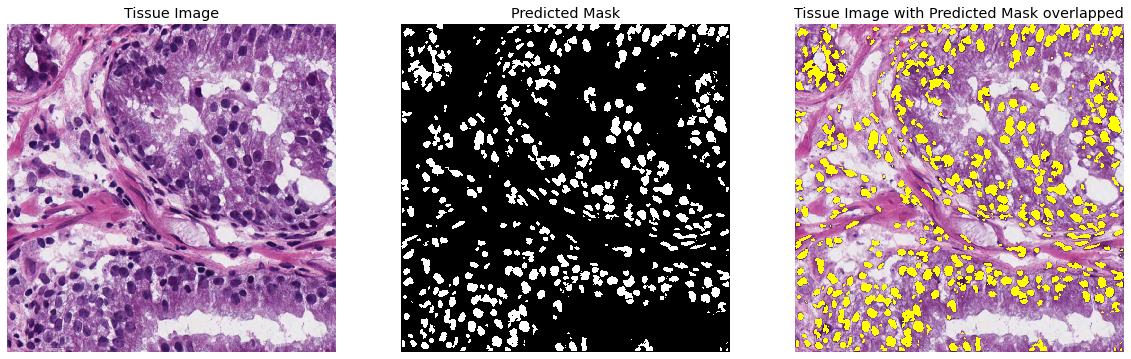

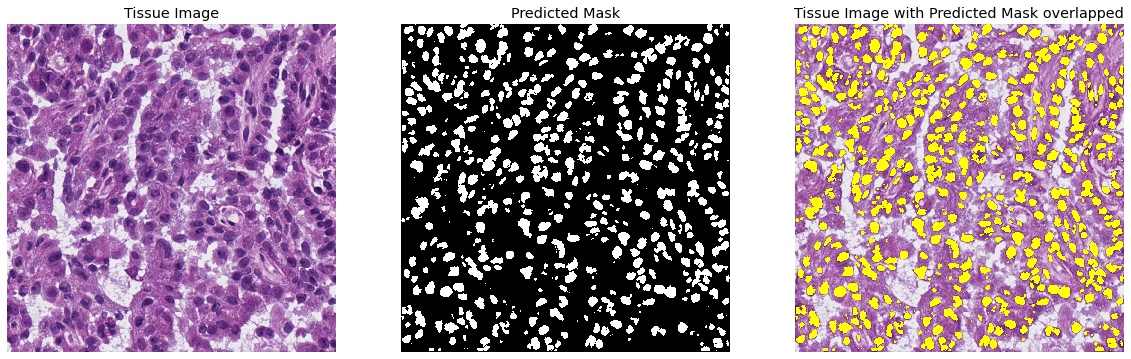

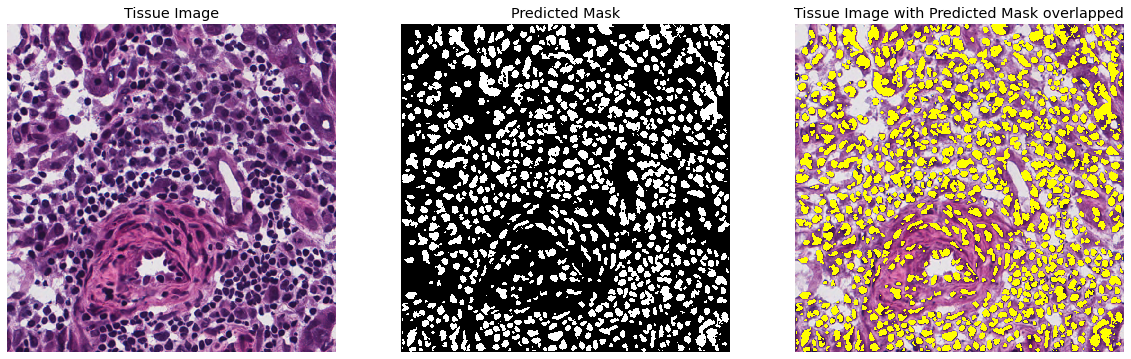

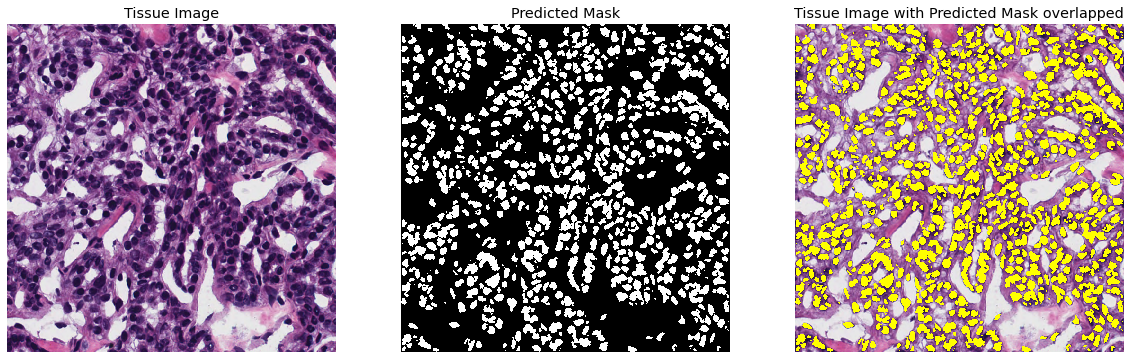

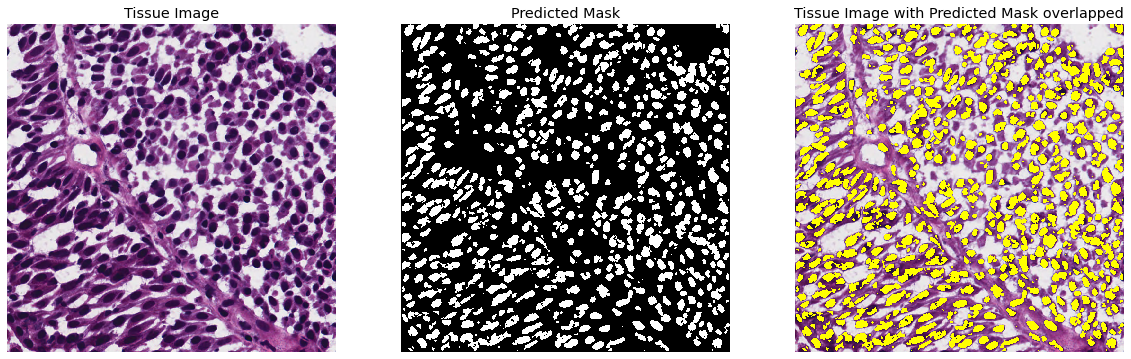

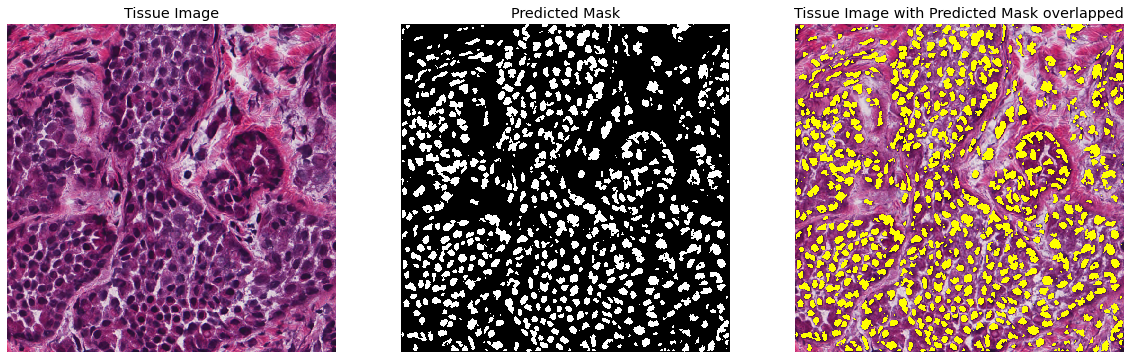

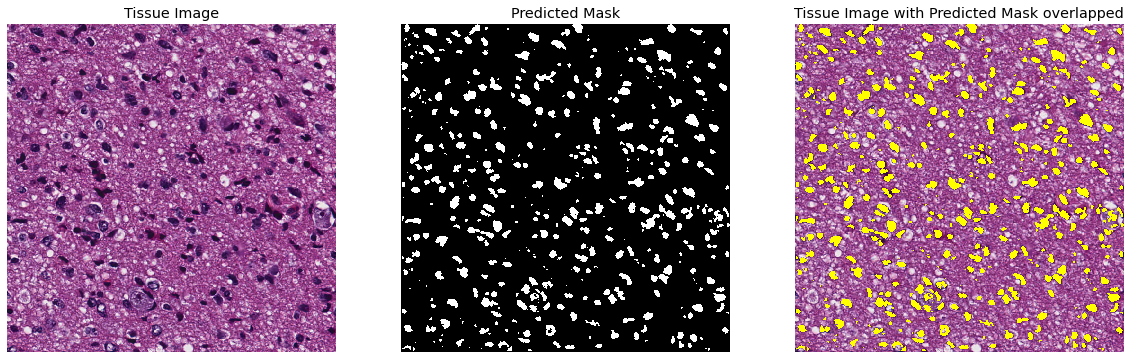

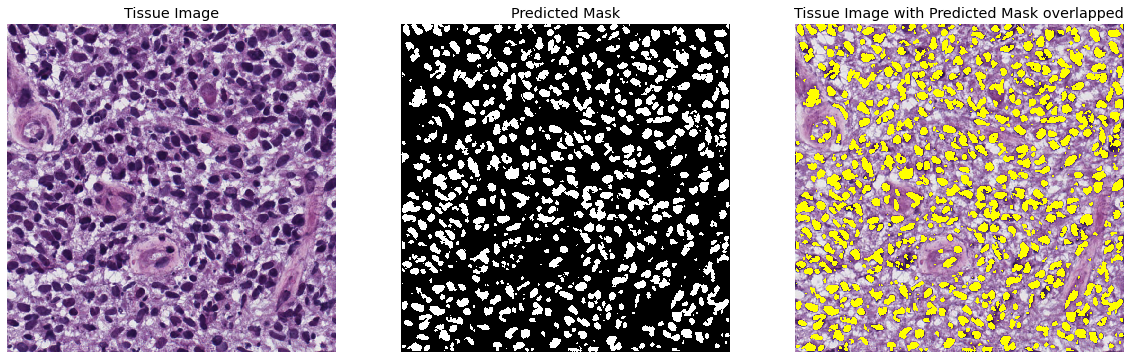

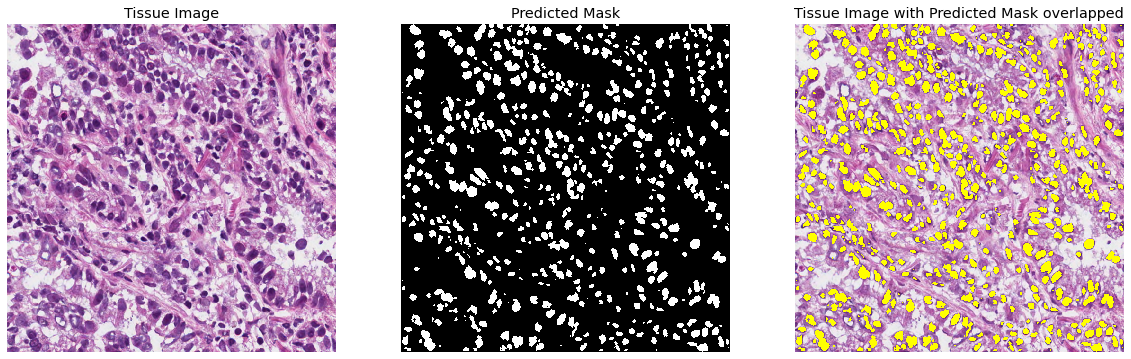

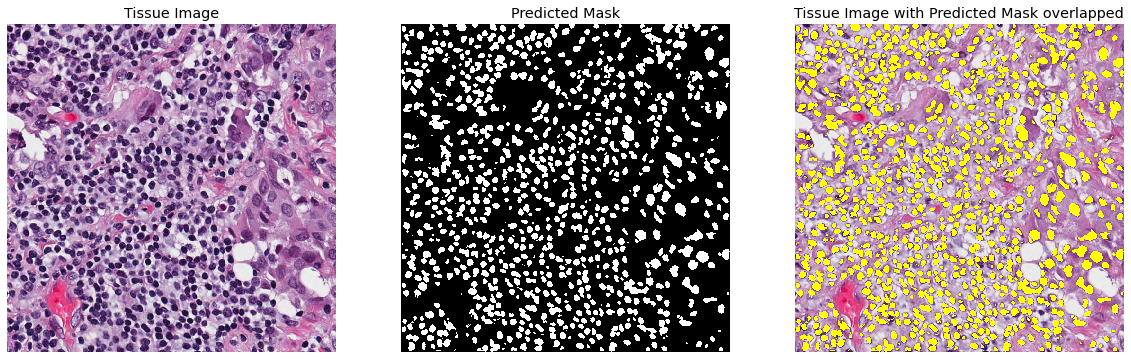

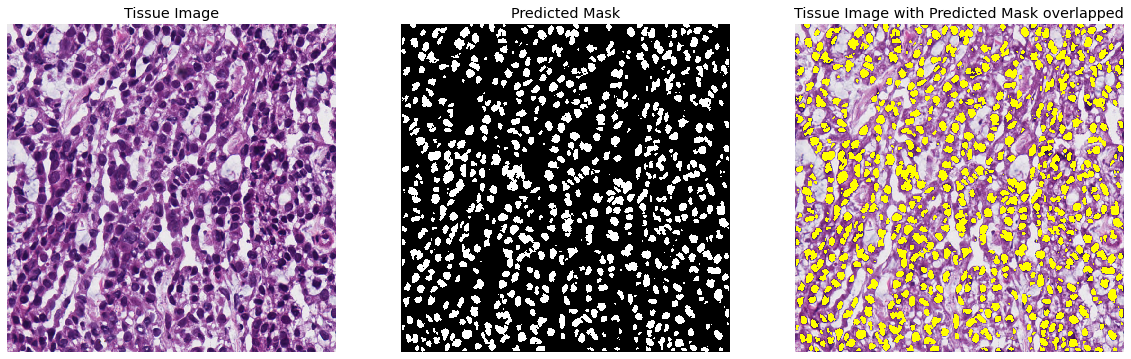

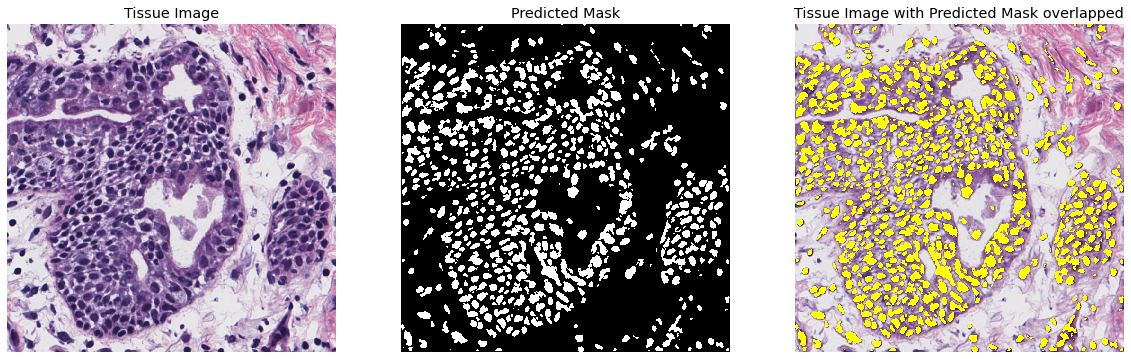

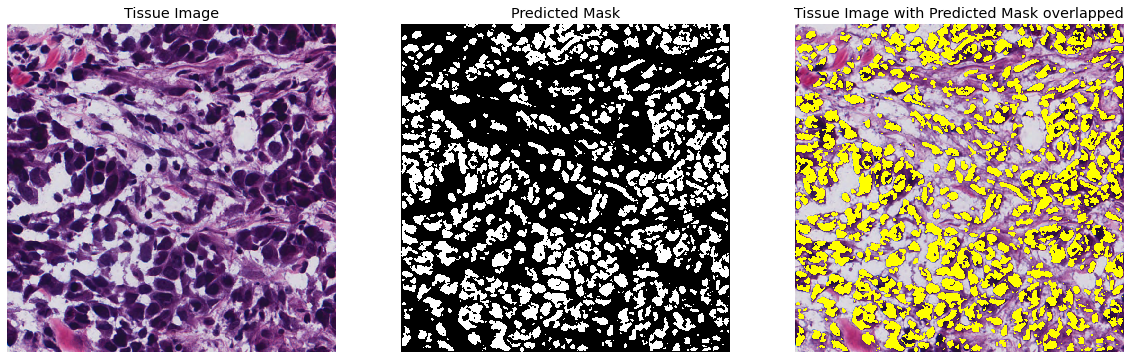

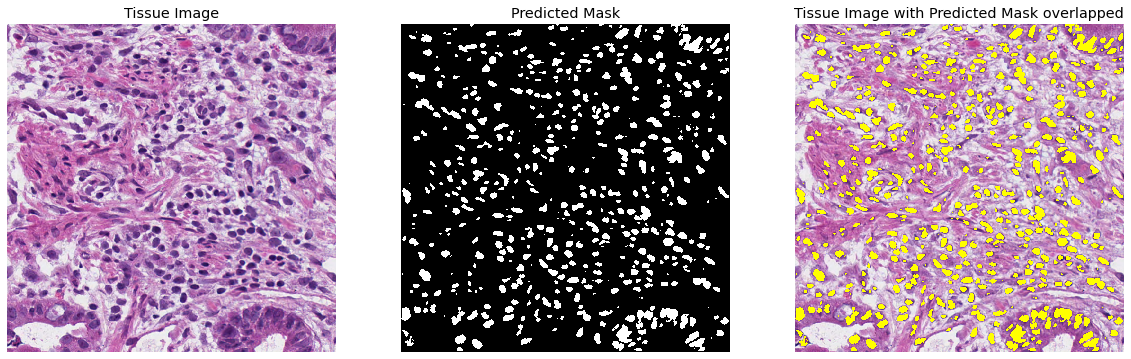

In [0]:
for idx in range(X_test.shape[0]):
    display.display_masked(X_test[idx], predictions[idx].round(0), "Tissue Image", "Predicted Mask")